In [32]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 15 16:45:30 2023

@author: Fernanda
"""
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
# Your data
powerVishay = np.array([77, 25, 8, 7.7])
dist = np.array([1, 5, 9, 15])

In [3]:
# Define the function you want to fit to the data
def func(x, a, b):
    return a * np.exp(b * x)

In [4]:
# Use curve_fit to fit the function to the data
params, covariance = curve_fit(func, dist, powerVishay)

In [6]:
# Extract the fitted parameters
a_fit, b_fit = params

# Generate points for the fitted curve
x_fit = np.linspace(min(dist)-1, max(dist)+15, 200)

y_fit = func(x_fit, a_fit, b_fit)


100.70738930854661

In [7]:
# experimental led data
N = 5
intensitySource = y_fit[0]/N

print(f'Intensity at the source per LED: {intensitySource:.2f}')


Intensity at the source per LED: 20.14


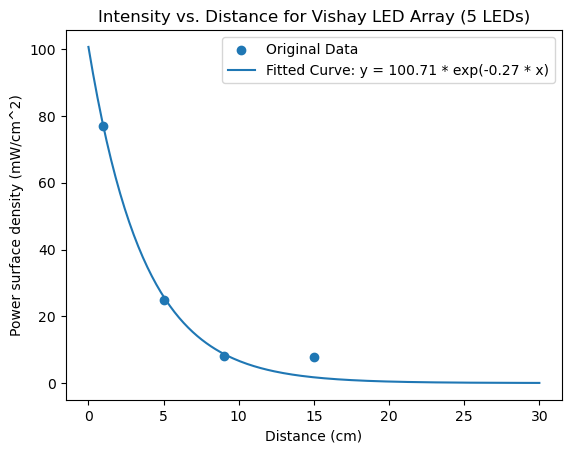

In [10]:
# Plot the original data and the fitted curve
plt.scatter(dist, powerVishay, label='Original Data')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {a_fit:.2f} * exp({b_fit:.2f} * x)')
plt.xlabel('Distance (cm)')
plt.ylabel('Power surface density (mW/cm^2)')
plt.legend()
plt.title(f"Intensity vs. Distance for Vishay LED Array ({N} LEDs)")
plt.show()

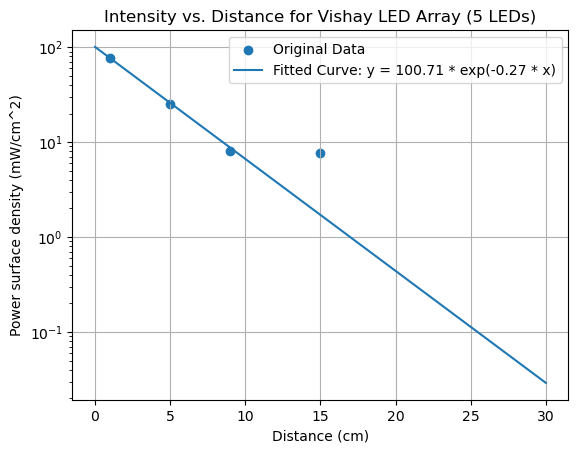

In [11]:
# Plot the original data and the fitted curve
plt.scatter(dist, powerVishay, label='Original Data')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {a_fit:.2f} * exp({b_fit:.2f} * x)')
plt.xlabel('Distance (cm)')
plt.ylabel('Power surface density (mW/cm^2)')
plt.legend()
plt.title(f"Intensity vs. Distance for Vishay LED Array ({N} LEDs)")
plt.grid()
plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

In [23]:
# Constants
wavelength = 810  # Wavelength of the NIR LED in nanometers
num_groups = 4  # Number of groups of LEDs

In [24]:
# Define the positions and intensities of the LED groups
group_positions = [(0.1,0.1,1), (1,0.1,0.1), (0.1,1,0.1), (-1,0.1,0.1)]  # (x, y,z) positions of the LED groups
# 60*5 = 300
N_top = 60
N_Back = 60
N_side = 60
intensity_at_source_top = intensitySource * N_top  # Intensity at the source (r = 0)
intensity_at_source_sides = intensitySource * 2 *N_side
intensity_at_source_back = intensitySource * N_Back 

In [ ]:
a_fit, b_fit
def intensity_dist(x,initial):
    return a_fit * np.exp(b_fit * x)

In [ ]:
# Calculate intensity as a function of distance (inverse square law) for multiple LED groups
def intensity(x,y,z):
    intensity_top = intensity_dist(,intensity_at_source_top)
    intensity_left = intensity_dist(distance,intensity_at_source_top)
    total_intensity = 0
    for x, y, z in group_positions:
        r = np.sqrt((x * distance) ** 2 + (y * distance) ** 2 + (z * distance) ** 2) 
        total_intensity += intensity_at_source_top /(4 * np.pi * (np.sqrt((x * distance) ** 2 ) ** 2)) + 2*intensity_at_source_sides/ (4 * np.pi * (np.sqrt((y * distance) ** 2 ) **2)) + intensity_at_source_back / (4 * np.pi * (np.sqrt((z * distance) )** 2)**2) 
    
    return total_intensity

# Define a range of distances to study
distances = np.linspace(1, 100, 100)  # Adjust the range as needed (in cm)

# Calculate intensities for the distances
intensities = [intensity(d) for d in distances]

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(distances, intensities, label=f'Wavelength {wavelength} nm ({num_groups} groups)')
plt.xlabel("Distance (cm)")
plt.ylabel("Intensity (W/m^2)")
plt.title(f"Intensity vs. Distance for Multiple LED Groups")
plt.legend()
plt.grid()
#plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

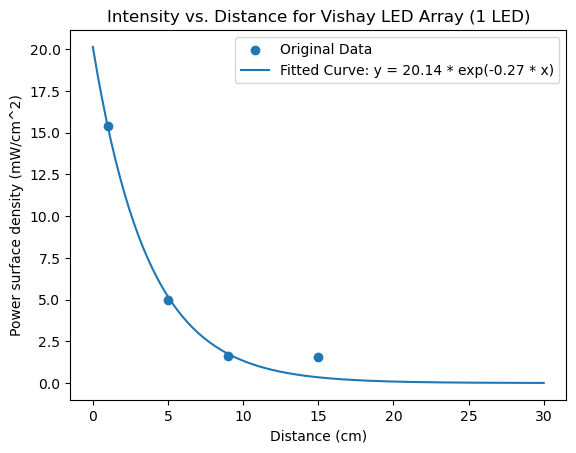

In [10]:
#number of LEDS per distance to achieve 50
y_fit_1 = func(x_fit, intensitySource, b_fit)

# Plot the original data and the fitted curve
plt.scatter(dist, powerVishay/5, label='Original Data')
plt.plot(x_fit, y_fit_1, label=f'Fitted Curve: y = {intensitySource:.2f} * exp({b_fit:.2f} * x)')
plt.xlabel('Distance (cm)')
plt.ylabel('Power surface density (mW/cm^2)')
plt.legend()
plt.title(f"Intensity vs. Distance for Vishay LED Array (1 LED)")
plt.show()

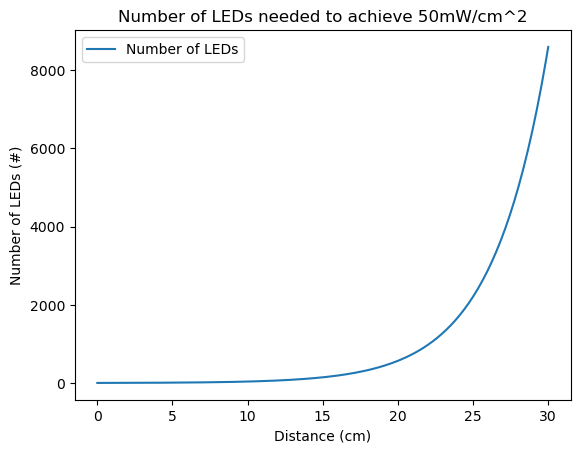

In [15]:
numberLEDs = 50/y_fit_1
# Plot the number of led needed per distance to achieve 
plt.plot(x_fit, numberLEDs, label=f'Number of LEDs')
plt.xlabel('Distance (cm)')
plt.ylabel('Number of LEDs (#)')
plt.legend()
plt.title(f"Number of LEDs needed to achieve 50mW/cm^2")
plt.show()

In [47]:
#distribution of leds per side

#computing areas in mm^2
area_top = 820*1055
area_side = 1055*715
area_back = 820*715
area_tot = area_top + area_side*2 + area_back

distTop = area_top/area_tot
distSide = area_side/area_tot
distBack = area_back/area_tot

#mean distance per side
def meanDist(d,w,l,td=False,z_size=0, z_fixed=0):
    '''
    d: minimum distance for the determined side 
    w: width of side
    l: length of side
    td: check if there is distance variation in z(3d); default is False
    z_size: legth of 3rd dimension; default is zero
    z_fixed: value for which z is fixed and begin of variation; default is zero
    '''
    x= w/2
    y= l/2
    mean = 0
    counter = 0
    for i in range(0,round(x)): 
        for j in range(0,round(y)):
            posX= math.sqrt(d**2+x**2)
            posY= math.sqrt(d**2+y**2)
            r= math.sqrt(posX**2+posY**2)
            counter += 1
            mean += r
    md = mean/counter
    if td: 
        conterz=0
        meanz=0
        for k in range(0, round(z_fixed)): 
            posZ = math.sqrt(md**2+k**2)
            counterz += 1
            meanz += posZ
        for k in range(0, round(z_size-z_fixed)):
            posZ = math.sqrt(md**2+k**2)
            counterz += 1
            meanz += posZ
        md = meanz/counterZ
            
    return md
    

#approx number of leds per side
def get_leds(rArea,y,x,d,w,l,td=False,z_size=0, z_fixed=0): 
    '''
    rArea: relative area
    y: distribution of power density per led
    x: distance values for determined power density
    d: minimum distance for the determined side 
    w: width of side
    l: length of side
    td: check if there is distance variation in z(3d); default is False
    z_size: legth of 3rd dimension; default is zero
    z_fixed: value for which z is fixed and begin of variation; default is zero
    '''
    rDtb = 50*rArea
    ledist = rDtb/y
    md = meanDist(d,w,l)
    leds = np.interp(md, x, ledist)
    
    return leds
    
#top
topLeds = get_leds(distTop,y_fit_1,x_fit,25,82,105.5) #fix monkeys height at 45cm
sideLeds = get_leds(distSide,y_fit_1,x_fit,0,82,105.5*2,td=True,z_size=71.5,z_fixed=71.5-25) #fix monkeys height bit moves across the plane 
backLeds = get_leds(distBack,y_fit_1,x_fit,0,105.5,82*2,td=True,z_size=71.5,z_fixed=71.5-25) #fix monkeys height bit moves across the plane 

totalLeds = topLeds+sideLeds*2+backLeds
print('Total nuber of LEDs needed:',totalLeds)

Total nuber of LEDs needed 8598.451052348642


1703.103613787608